In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This lets you upload your file

# Assume you uploaded 'data.csv'
data = pd.read_csv('mental-heath-in-tech.csv')

print(df.head())

Saving mental-heath-in-tech.csv to mental-heath-in-tech (5).csv
   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   

In [96]:
data.head(2) # shows two rows of the dataset

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never


In [97]:
display(data.info())   # displays the type of questions asked durig survey

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

None

#Exploratory Data analysis

#### 1.Dealing with the missing values
###### select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

<Axes: ylabel='Density'>

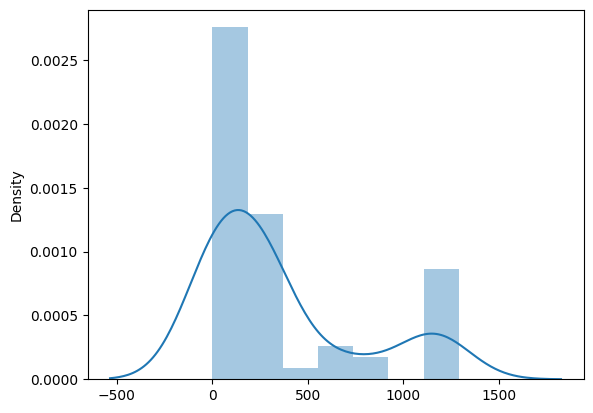

In [98]:
print(data.isnull().sum()) # null values in every column
sns.distplot(data.isnull().sum())

In [99]:
data_copy = data.copy()   # dummy data to restore origial dataset

In [100]:
########################## Columns with Missing values > 300 ##########################
col_m = data.isnull().sum() > 300
cols_m= col_m[col_m==True]
#print(len(cols_m))
data_missing = data[cols_m.index]
#print(df_missing.shape)
data_missing.columns

Index(['Is your primary role within your company related to tech/IT?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you know local or online resources to seek help for a mental health disorder?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Do you believe your productivity is ever affected by a mental health

In [101]:
## select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis
col = data.isnull().sum() < 300
cols = col[col==True]
print(len(cols))
data1 = data[cols.index]
print(data1.shape)
# df1.columns

45
(1433, 45)


#### 4.2 Dealing with outliers

Text(0.5, 1.0, 'With outliers removed')

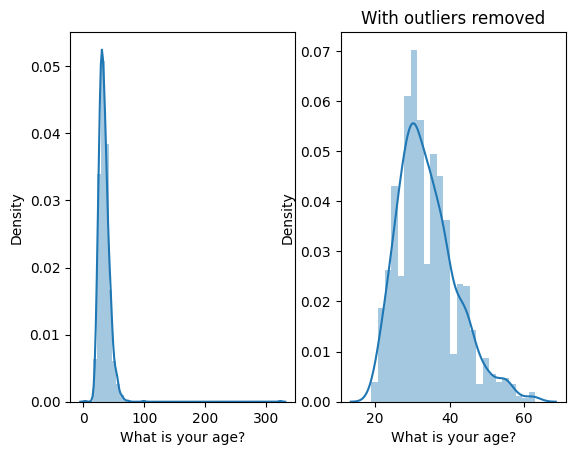

In [102]:
## check demographic information
fig,axs = plt.subplots(1,2)
fig1 =sns.distplot(data["What is your age?"],ax = axs[0])

## remove outliers
data1["age"] = data["What is your age?"]
data2 = data1[(18 < data1["age"])  & (data1["age"] < 65)]
fig2 = sns.distplot(data2["What is your age?"], ax = axs[1])
fig2.set_title("With outliers removed")

#### 4.3 clean up messy data and recode

In [103]:
mylist = ["Male","Man","man","male","MALE","female","Female", "F","M","f","m","woman","Woman"]
gender= data2["What is your gender?"].apply(lambda x: (x in mylist)) ## Return True/False
data2["What is your gender?"] = data2["What is your gender?"][gender]  ## Only retain True

print(data1.shape)

## Recoding
mapping =({"male":"Male",
           "Man":"Male",
           "man":"Male",
           "m":"Male",
           "M":"Male",
           "MALE":"Male",
           "Male":"Male",
           "woman":"Female",
           "Woman":"Female",
           "Female":"Female",
           "female":"Female",
           "f":"Female",
           "F":"Female"})

data2['gender'] = data2["What is your gender?"].map(mapping)
print(data2['gender'].value_counts())

(1433, 46)
gender
Male      1024
Female     315
Name: count, dtype: int64


### Statistical Analysis

In [104]:
## Group items into sub groups for further analysis

## demographic
print("Demographic info")
print(data2.columns[39:43])
print()

## status
print("status")
print(data2.columns[[0,32,33,34,35,36,37,38]])
print()

##info about company
print("info about company")
print(data2.columns[[1,2]])
print()

## related to previous employers
print("Items related to previous employers")
print(data2.columns[15:25])
print()

## health insurance coverage
print("Mental health coverage&resources")
print(data2.columns[[3,4,5]])
print()

## Mental health conseuqences
print("Mental health consequences")
print(data2.columns[[6,7,8,9,10,11,28,29]])
print()

## Past experiences
print()
print("Past experiences")
print(data2.columns[[13,31]])

## Willing to talk
print()
print("Willing to talk about")
print(data2.columns[[26,27,30]])

Demographic info
Index(['What is your age?', 'What is your gender?',
       'What country do you live in?', 'What country do you work in?'],
      dtype='object')

status
Index(['Are you self-employed?',
       'Do you have a family history of mental illness?',
       'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'],
      dtype='object')

info about company
Index(['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?'], dty

In [105]:
print(data2.shape)
print()
print(data2.iloc[:,2].value_counts(dropna = False))
print()
data2_f = data2[data2.iloc[:,2] == 1]
print(data2_f.shape)

(1424, 47)

Is your employer primarily a tech company/organization?
1.0    878
NaN    285
0.0    261
Name: count, dtype: int64

(878, 47)


In [106]:
#filling NaN values
data2_f.fillna(method='ffill',inplace=True)
data2_f.fillna(value='Yes', limit=1,inplace=True)

In [107]:
data2_f.head(2)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?,age,gender
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes,39,Male
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never,29,Male


### Now analysing all the 47 real questions and what possible values they take.

In [108]:
data2_f.drop(['What is your gender?'],axis=1,inplace=True) ### droping gender column, already replaced it with gender

In [109]:
#listing all questions in real_features
real_features=(list(data2_f))
print(len(real_features))

46


In [110]:
# showing possible answers to any questions for further analysis
for index,val in enumerate(real_features):
    p=data2_f[val].unique()
    print(index,val)
    print(p)
    print('\n')

0 Are you self-employed?
[0]


1 How many employees does your company or organization have?
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']


2 Is your employer primarily a tech company/organization?
[1.]


3 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' "I don't know"]


5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' "I don't know"]


6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
["I don't know" 'Yes' 'No']


7 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
['Very easy' 'Somewhat easy' 'Neither e

In [111]:
############## encoding country name with numerical value ################
country=(data2_f[real_features[41]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
data2_f[real_features[41]].replace(alp_rep, num_rep,inplace=True)  # Replacing country name with the index

42 42


In [112]:
country=(data2_f[real_features[40]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
data2_f[real_features[40]].replace(alp_rep, num_rep,inplace=True)

41 41


In [113]:
# cosidering only threshold value for column "How many employees does your company or organization have?"
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('1-5', 5)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('6-25',25)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('26-100', 100)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('100-500',500)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('500-1000',1000)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('More than 1000',5000)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace(np.nan,5)

###**Encoding**

In [114]:
####################### encodig all categorical columns #########################
numeric = {real_features[3]:     {'Not eligible for coverage / N/A':0,'No':0, 'Yes':1, "I don't know":2},
                 real_features[4]:{'No':0, 'Yes':1, "I don't know":2},
                  real_features[5]:{'No':0, 'Yes':1, "I don't know":2},
                   real_features[6]:{"I don't know":2, 'Yes':1, 'No':0},
                    real_features[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2}, #### MODIFIED DIRECTLY
                real_features[8]:{'No':0, 'Maybe':2, 'Yes':1},
                real_features[9]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[10]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[11]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[12]:{"I don't know":2, 'Yes':1, 'No':0},
                 real_features[13]:{'No':0, 'Yes':1},
                 real_features[15]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
                 real_features[16]:{'N/A (not currently aware)':0, 'I was aware of some':1,
                                    'Yes, I was aware of all of them':1, 'No, I only became aware later':0},  ### MODIFIED DIRECTLY
                real_features[17]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, they all did':1},
                real_features[18]:{'None did':0, 'Some did':3, 'Yes, they all did':1},
                real_features[19]:{"I don't know":2, 'Yes, always':1, 'Sometimes':3, 'No':0},
                real_features[20]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
                real_features[21]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[22]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[23]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[24]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
                real_features[25]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[26]:{'Maybe':2, 'Yes':1, 'No':0},
           real_features[27]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[28]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
                real_features[29]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
                real_features[30]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
                real_features[31]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
                real_features[32]:{'No':0, 'Yes':1, "I don't know":2},
                real_features[33]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[34]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[35]:{'Yes':1, 'No':0},
                real_features[37]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
                real_features[38]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
                real_features[45]:{'Male':1, 'Female':0, 'Genderqueer/Other':2},
           real_features[43]:{'Sometimes':3, 'Never':0, 'Always':1}
          }

In [115]:
countries = data['What country do you work in?'].sort_values().unique()
countries

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'India',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Other',
       'Pakistan', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovakia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'Venezuela', 'Vietnam'], dtype=object)

In [116]:
data2_f['Is your employer primarily a tech company/organization?'] = data2_f['Is your employer primarily a tech company/organization?'].fillna(0).astype(int)
print(data2_f)
print(data2_f.dtypes)

      Are you self-employed?  \
0                          0   
1                          0   
2                          0   
5                          0   
6                          0   
...                      ...   
1425                       0   
1426                       0   
1427                       0   
1430                       0   
1432                       0   

      How many employees does your company or organization have?  \
0                                                   100            
1                                                    25            
2                                                    25            
5                                                  5000            
6                                                   100            
...                                                 ...            
1425                                                500            
1426                                                500            
142

In [117]:
data2_f.replace(numeric, inplace=True)
data2_f.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,0,4,4,39,0,0,Back-end Developer,3,39,1
1,0,25,1,0,1,1,1,1,0,0,...,1,0,3,29,1,1,Back-end Developer|Front-end Developer,0,29,1
2,0,25,1,0,0,0,2,2,2,0,...,1,4,4,38,0,0,Back-end Developer,1,38,1
5,0,5000,1,1,0,1,1,1,1,1,...,1,4,1,42,0,0,DevOps/SysAdmin|Support|Back-end Developer|Fro...,3,42,1
6,0,100,1,2,0,0,2,1,0,0,...,0,4,4,30,1,1,Back-end Developer,3,30,1


In [118]:
work_pos_s = data2_f['Which of the following best describes your work position?']
data4_f = data2_f.copy()
data4_f = data4_f.drop(["Which of the following best describes your work position?"],axis=1)
data4_f.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What country do you live in?,What country do you work in?,Do you work remotely?,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,1,0,4,4,39,0,0,3,39,1


In [119]:
data3_f = data4_f.copy()
# renamig columns to ease up the work
data_reformed = {
    "Are you self-employed?":"self_employed?",
    "How many employees does your company or organization have?":"num_employees",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"mh_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?":"mh_know_options",
    "Is your employer primarily a tech company/organization?":"is_tech",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"mh_discuss",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?":"mh_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"mh_anonyimity",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:":"mh_leave",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?":"mh_neg_consequece",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"ph_neg_consequece",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?":"comf_coworker",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?":"comf_supervisor",
    "Do you feel that your employer takes mental health as seriously as physical health?":"mh_serious",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?":"mh_others_neg_consequece",
    "Do you have previous employers?":"prev_employers",
    "Have your previous employers provided mental health benefits?":"mh_benefits_prev_employers",
    "Were you aware of the options for mental health care provided by your previous employers?":"mh_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"prev_employers_discuss",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?":"pep_comf_cw",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?":"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
    "Would you bring up a mental health issue with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you currently have a mental health disorder?":"mh_cur",
    "What country do you live in?":"home_country",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?":"sought_treat",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?":"work_affect_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?":"work_affect_ineffect",
    #"What is your age?":"age",
    "Which of the following best describes your work position?":"position",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote"
}

data3_f=data3_f.rename(columns=data_reformed)

In [120]:
data3_f.head()

,self_employed?,num_employees,is_tech,mh_benefits,mh_discuss,mh_learn,mh_anonyimity,mh_leave,mh_neg_consequece,ph_neg_consequece,...,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,What is your age?,home_country,work_country,work_remote,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,1,0,4,4,39,0,0,3,39,1
1,0,25,1,0,1,1,1,1,0,0,...,1,1,0,3,29,1,1,0,29,1
2,0,25,1,0,0,0,2,2,2,0,...,0,1,4,4,38,0,0,1,38,1
5,0,5000,1,1,0,1,1,1,1,1,...,0,1,4,1,42,0,0,3,42,1
6,0,100,1,2,0,0,2,1,0,0,...,0,0,4,4,30,1,1,3,30,1


In [121]:
data3_f = data3_f.drop(["What is your age?"],axis=1)

#EDA

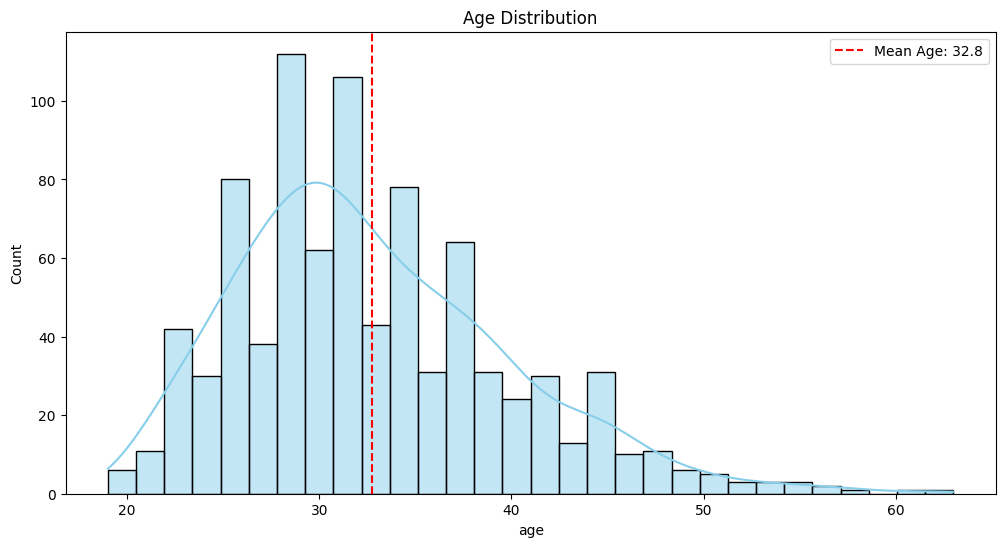

In [122]:
# ------- 1. Age Analysis --------
if 'age' in data3_f.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data3_f['age'].dropna(), bins=30, kde=True, color='skyblue')
    plt.axvline(data3_f['age'].mean(), color='red', linestyle='--', label=f'Mean Age: {data3_f["age"].mean():.1f}')
    plt.title('Age Distribution')
    plt.legend()
    plt.show()

The average age of respondents is around 30 years old, with the majority falling in the 25-35 age group. This reflects the relatively younger demographic in the tech workforce, which aligns with tech industry hiring trends.

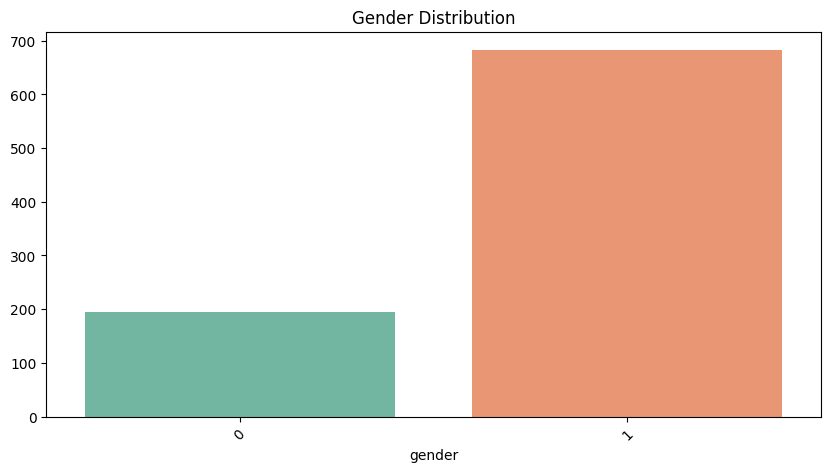

In [123]:
# ------- 2. Gender Distribution --------
if 'gender' in data3_f.columns:
    plt.figure(figsize=(10, 5))
    gender_counts = data3_f['gender'].value_counts()
    sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='Set2')
    plt.title('Gender Distribution')
    plt.xticks(rotation=45)
    plt.show()

The dataset is heavily skewed towards male respondents, which is not surprising given the male-dominated tech industry. However, it’s crucial to analyze how gender impacts mental health outcomes in this context.

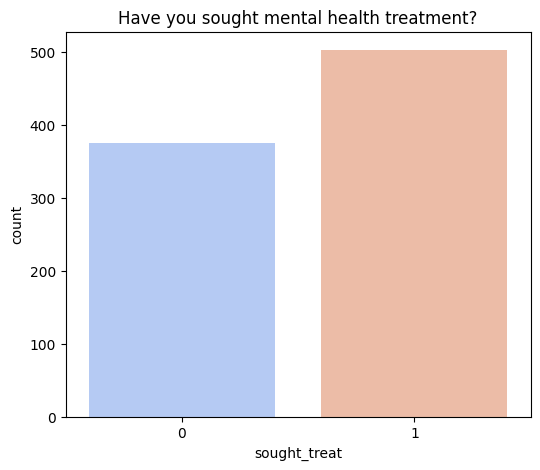

In [124]:
# ------- 3. Treatment Rate --------
if 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x='sought_treat', data=data3_f, palette='coolwarm')
    plt.title('Have you sought mental health treatment?')
    plt.show()

A significant portion of respondents have sought mental health treatment. This is encouraging, but it also highlights the prevalence of mental health challenges in the tech workforce.

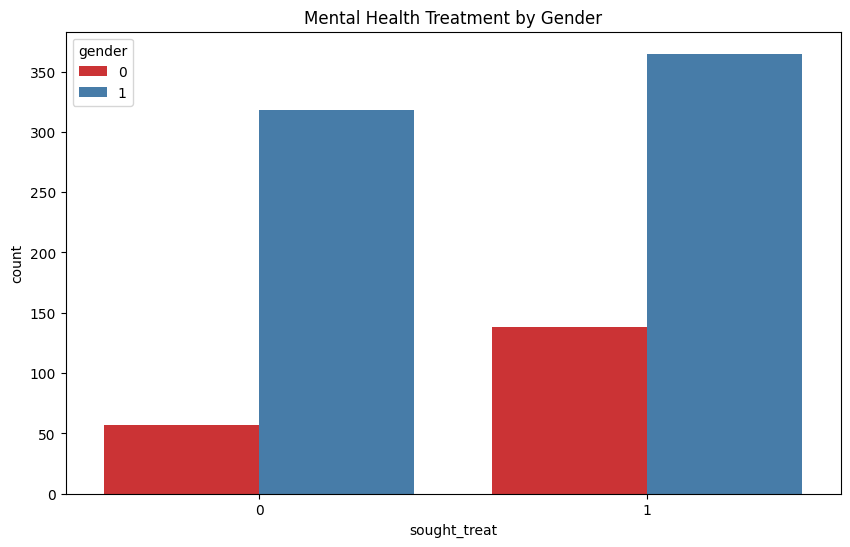

In [125]:
# ------- 4. Treatment by Gender --------
if 'sought_treat' in data3_f.columns and 'gender' in data3_f.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sought_treat', hue='gender', data=data3_f, palette='Set1')
    plt.title('Mental Health Treatment by Gender')
    plt.show()

Women and non-binary respondents are more likely to seek treatment compared to men. This could reflect differences in stigma, cultural norms, or comfort discussing mental health.

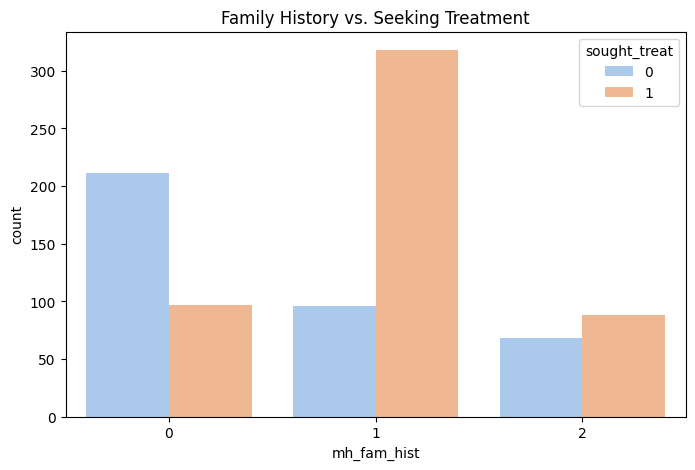

In [126]:
# ------- 5. Family History Influence --------
if 'mh_fam_hist' in data3_f.columns and 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='mh_fam_hist', hue='sought_treat', data=data3_f, palette='pastel')
    plt.title('Family History vs. Seeking Treatment')
    plt.show()

People with a family history of mental health issues are more likely to seek treatment themselves. This suggests that awareness from family experiences may make people more proactive in managing their own mental health.

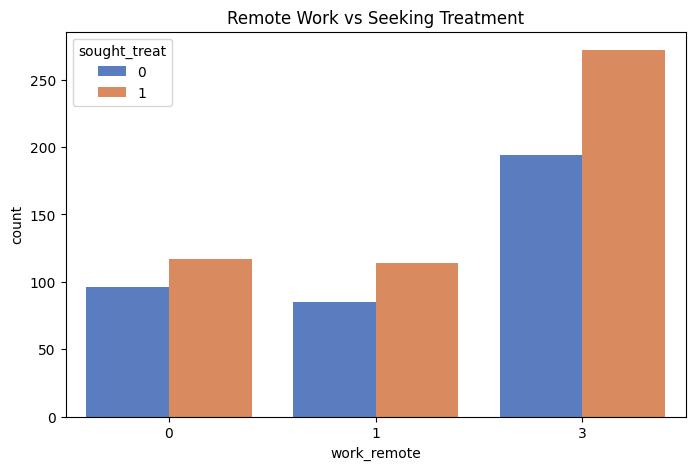

In [127]:
# ------- 6. Remote Work & Mental Health --------
if 'work_remote' in data3_f.columns and 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='work_remote', hue='sought_treat', data=data3_f, palette='muted')
    plt.title('Remote Work vs Seeking Treatment')
    plt.show()

Remote workers seem slightly more likely to seek treatment. This could reflect that remote work creates more isolation or that remote workers have more flexibility to pursue treatment compared to office workers.

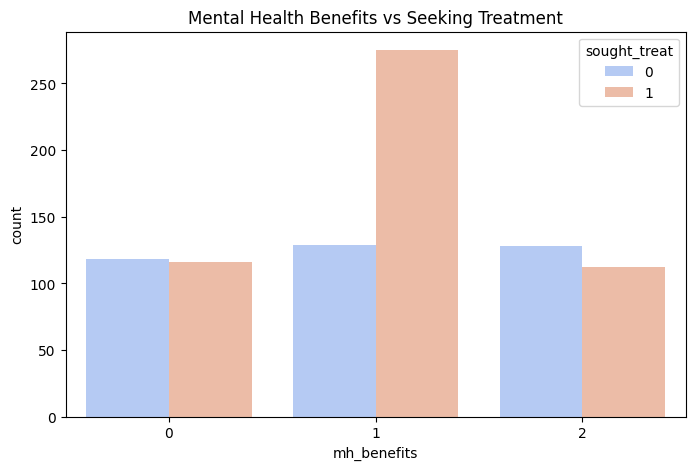

In [128]:
# ------- 7. Mental Health Benefits Impact --------
if 'mh_benefits' in data3_f.columns and 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='mh_benefits', hue='sought_treat', data=data3_f, palette='coolwarm')
    plt.title('Mental Health Benefits vs Seeking Treatment')
    plt.show()

Employees with access to mental health benefits are far more likely to seek treatment. This confirms the importance of company-provided mental health support in reducing barriers to care.

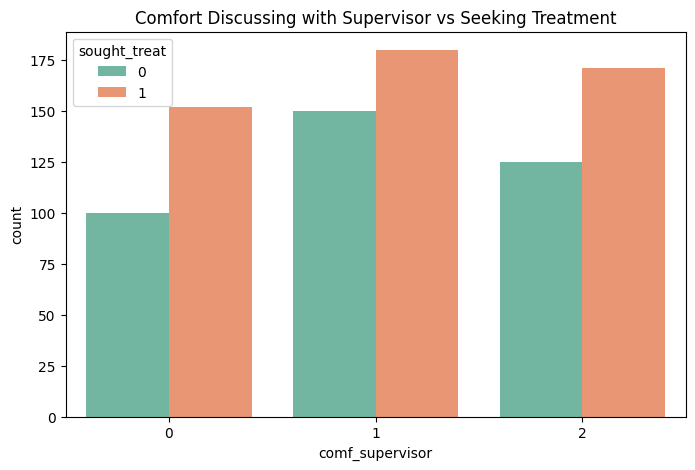

In [129]:
# ------- 8. Comfort Discussing with Supervisor --------
if 'comf_supervisor' in data3_f.columns and 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='comf_supervisor', hue='sought_treat', data=data3_f, palette='Set2')
    plt.title('Comfort Discussing with Supervisor vs Seeking Treatment')
    plt.show()

If employees feel comfortable discussing mental health with their supervisor, they are much more likely to seek treatment. This highlights that psychological safety at work directly affects whether people take action on their mental health.

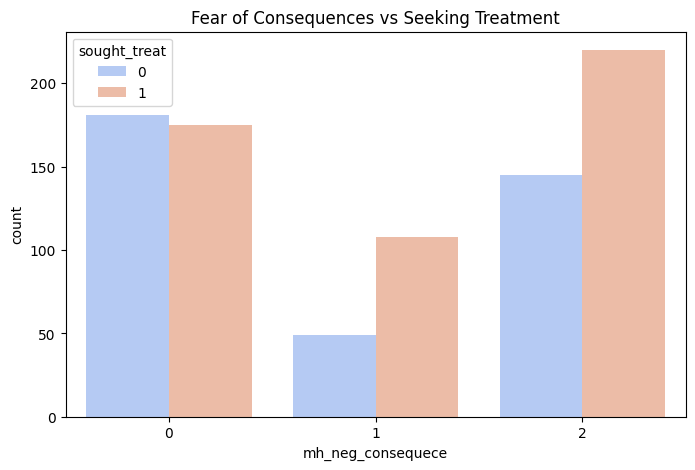

In [130]:
# ------- 9. Fear of Consequences --------
if 'mh_neg_consequece' in data3_f.columns and 'sought_treat' in data3_f.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='mh_neg_consequece', hue='sought_treat', data=data3_f, palette='coolwarm')
    plt.title('Fear of Consequences vs Seeking Treatment')
    plt.show()

Where employees fear negative consequences from discussing mental health at work, treatment rates are lower. This shows that stigma and fear of judgment remain strong barriers to care, even in modern workplaces.